In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scipy as scipy
from scipy import signal 
np.random.seed(1)
from scipy.interpolate import interp1d
from matplotlib import pyplot
from matplotlib.pyplot import plot, show,grid
from os.path import dirname, join as pjoin
import scipy.io as sio
from numpy.linalg import inv

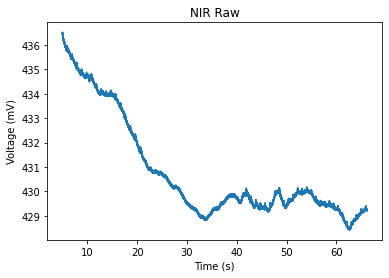

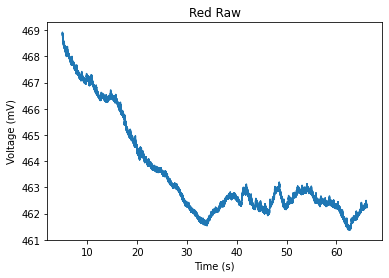

In [96]:
df = sio.loadmat("/Users/annalassiter/Desktop/Lab/wrist_hypoxia_4.mat") # Uploading data into dataframe

TS = 1e-3
FS = int(1/TS)
START = 5 * FS

channel = 2 # Channel starting from 0 

r = df["RED"] 
i = df["NIR"] 
t = df["TIME"]
red  = np.array(r)
nir = np.array(i)
time = np.array(t[START:, ])
# Separates Data into Channel
red_raw = red[ START :, channel]
nir_raw = nir[ START :, channel]

# Plotting Raw Data
plt.plot(time, nir_raw)
plt.title("NIR Raw")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (mV)")
plt.show()

plt.plot(time, red_raw)
plt.title("Red Raw")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (mV)")
plt.show()


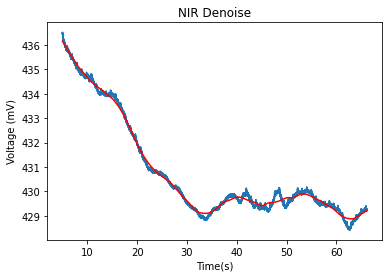

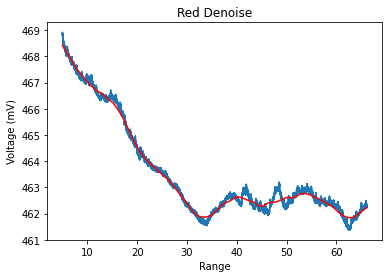

In [97]:
# Denoise (Local Average)
window_length = 5 * FS + 1

x = time
y = nir_raw
nir_ave = scipy.signal.savgol_filter(y, int(window_length), 1)
plt.plot(x,y)
plt.plot(x,denoise_nir, color='red')
plt.title("NIR Denoise")
plt.xlabel("Time(s)")
plt.ylabel("Voltage (mV)")
plt.show()


x = time
y = red_raw
red_ave = scipy.signal.savgol_filter(y, int(window_length), 1)
plt.plot(x,y)
plt.plot(x,denoise_red, color='red')
plt.title("Red Denoise")
plt.xlabel("Range")
plt.ylabel("Voltage (mV)")
plt.show()

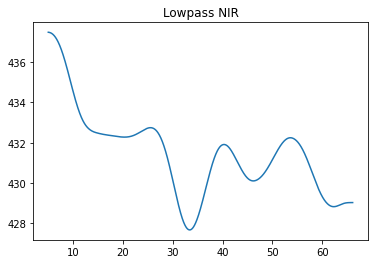

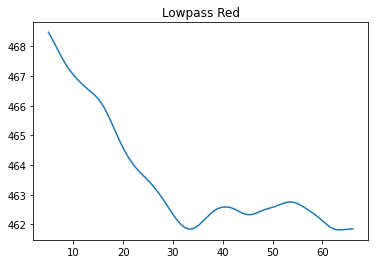

In [98]:
# Lowpass (BASELINE)

FC = 0.1

# NIR 
def lowPassFilter(signal):
    nyq = 0.5 * FS
    order = 4

    b, a = scipy.signal.butter(order, FC/(FS/2), 'low', analog=False)
    y = scipy.signal.filtfilt(b, a, signal, axis = 0)

    return y

data = nir_raw
filtered_signal = lowPassFilter(data)
plt.plot(time, filtered_signal)
plt.title("Lowpass NIR")
plt.show()

intensity_nir = np.divide(filtered_signal, denoise_nir) #NIR_f in matlab code

# Red
def lowPassFilter(signal):
    nyq = 0.5 * FS
    order = 2

    b, a = scipy.signal.butter(order, FC/(FS/2), 'low', analog=False)
    y = scipy.signal.filtfilt(b, a, signal, axis = 0)

    return y

data = red_raw
filtered_signal = lowPassFilter(data)
plt.plot(time, filtered_signal)
plt.title("Lowpass Red")
plt.show()

intensity_red = np.divide(filtered_signal, denoise_red) #NIR_f in matlab code


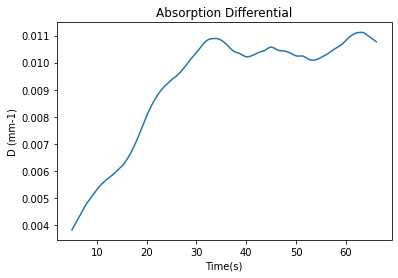

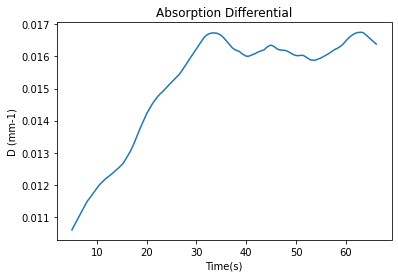

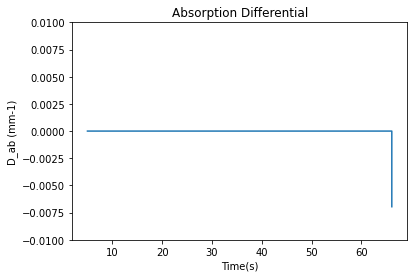

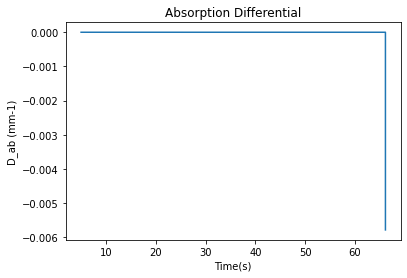

In [99]:
# Calculate Differential
# Initial light intensity
RED_IO = 480
NIR_IO = 440

#absorption
red_ab = np.log10(RED_IO/red_ave)
nir_ab = np.log10(NIR_IO/nir_ave)

# differential
red_ab_diff = np.roll(red_ab, -1) - red_ab
nir_ab_diff = np.roll(nir_ab, -1) - nir_ab


# plots
plt.plot(time, nir_ab)
plt.title("Absorption Differential")
plt.ylabel("D (mm-1)")
plt.xlabel("Time(s)")
plt.show()

plt.plot(time, red_ab)
plt.title("Absorption Differential")
plt.ylabel("D (mm-1)")
plt.xlabel("Time(s)")
plt.show()

plt.plot(time, nir_ab_diff)
plt.title("Absorption Differential")
plt.ylim(-.01,.01)
plt.ylabel("D_ab (mm-1)")
plt.xlabel("Time(s)")
plt.show()

plt.plot(time, red_ab_diff)
plt.title("Absorption Differential")
plt.ylabel("D_ab (mm-1)")
plt.xlabel("Time(s)")
plt.show()

In [100]:
# Calculate Concentration Differential 

extin_ox_RED = 0.011
extin_ox_NIR = 0.028
extin_deox_RED = 0.016
extin_deox_NIR = 0.018
dB = 3

m1 = np.matrix([[extin_deox_NIR, extin_ox_NIR] , [extin_deox_RED, extin_ox_RED]]) # must be square for an inverse to work
m2 = np.matrix([red_ab_diff, nir_ab_diff])
inv_m1 = inv(m1)
conc_diff = (1/dB) * np.matmul(inv_m1, m2)

plt.plot(time_r, conc_diff[1:, ])
plt.show()

plt.plot(time_r, conc_diff[2:, ])
plt.show()
# conc_diff.shape = (2, 61100)

#conc_diff[0:, ] stores deoxyhemoglobin conc change
#conc_diff[1:, ] stores oxyhemoglobin conc change 

KeyboardInterrupt: 

In [87]:
# Calculate Oxygen Saturation

# Initial Concentration
conc_deox0 = 0.055
conc_ox0 = 2.9

conc_deox = conc_deox0
conc_ox = conc_ox0 

tissue_Sp02 = np.zeros((len(time), 1))
conc = np.zeros((2, len(time)))

for t in range(len(time)):
    tissue_Sp02 = 100 * conc_ox/(conc_ox + conc_deox)
    conc[0:, t] = conc_deox
    conc[1:, t] = conc_deox
    conc_deox = conc_deox + conc_diff[1:, t]
    conc_ox = conc_ox + conc_diff[2:, t]


time_r = np.reshape(time, (1, 61100))

plt.plot(time, conc[1:, ])
plt.show()

plt.plot(time, conc[2:, ])
plt.show()

plt.plot(time, tissue_Sp01)
plt.show()

plt.plot(time,  intensity_nir_1)
plt.show()


Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x7f8a2741f790>
Traceback (most recent call last):
  File "/Users/annalassiter/Library/Python/3.9/lib/python/site-packages/matplotlib/transforms.py", line 200, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id(self): pop(k))
KeyboardInterrupt: 


nes.Line2D at 0x7f8a47d9a940>,
 ...]

Error in callback <function flush_figures at 0x7f8a8b739550> (for post_execute):


KeyboardInterrupt: 